In [25]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('diabetes.csv')

# datasource: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [27]:
# check the top 5 rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# check the last 5 rows of the dataframe
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [29]:
# check the shape of the dataframe
df.shape

(768, 9)

-  The dataset contains 768 rows and 9 columns.

In [30]:
# check the datatype of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The data types of the columns are either integers (int64) or floating-point numbers (float64). Two columns (BMI and DiabetesPedigreeFunction) have floating-point numbers as their data types.

In [31]:
# check the basic statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Patients in the dataset have an average of 3.8 pregnancies, a mean glucose level of 120.9 mg/dL, an average BMI of 32.0 kg/m^2, and an average age of 33.2 years. The outcome column has a mean of 0.35, indicating that 35% of the patients in the dataset have been diagnosed with diabetes.

## Data Cleaning

#### Missing Values

In [32]:
# check the missing values in the dataframe
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no missing values in the dataset.

#### Duplicated Rows

In [33]:
# check the duplicated rows in the data
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


- There are no duplicated rows in the dataset.

#### Outliers

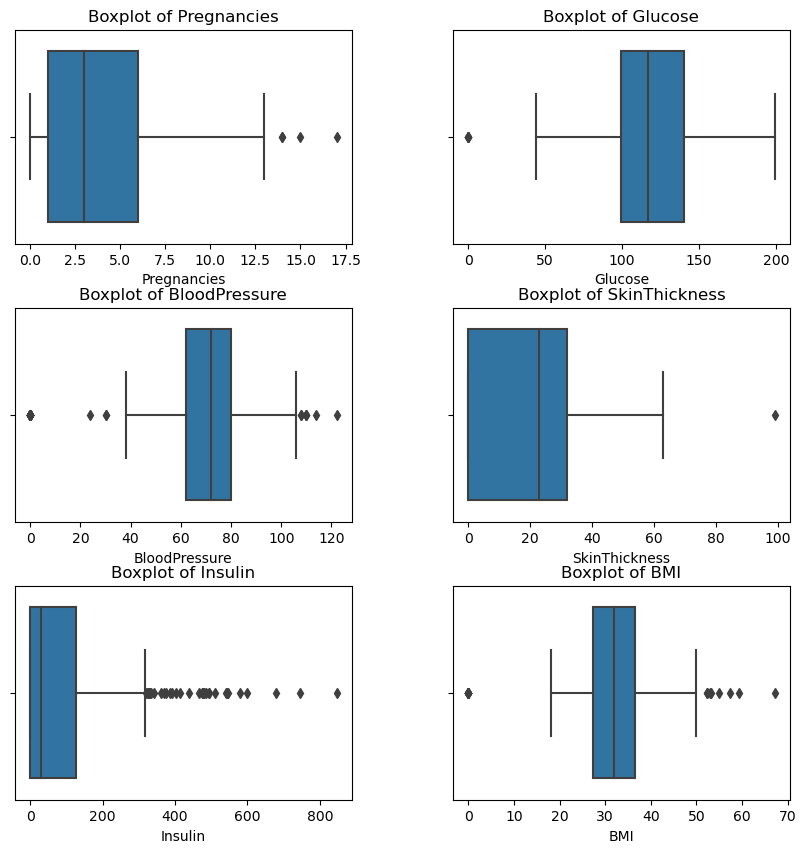

In [34]:
# Create a 3x2 grid of subplots for the boxplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Iterate over each column and create a boxplot in the corresponding subplot
col_index = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(x=df[df.columns[col_index]], ax=axs[i,j])
        axs[i,j].set_title(f'Boxplot of {df.columns[col_index]}')
        col_index += 1

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Display the plot
plt.show()

- There are alot of outliers in the columns in the dataset so I will remove them in the next step.

In [35]:
# define the function to remove the outliers
def remove_outliers(df, col_list):
    for col in col_list:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]

    return df

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
df = remove_outliers(df, cols)

print('Shape of the dataset after removing the outliers:', df.shape)

Shape of the dataset after removing the outliers: (647, 9)


## Exploratory Data Analysis

### Univariate Analysis

#### Univariate analysis on the categorical column

In [36]:
# value count of Outcome column
df['Outcome'].value_counts()

0    446
1    201
Name: Outcome, dtype: int64

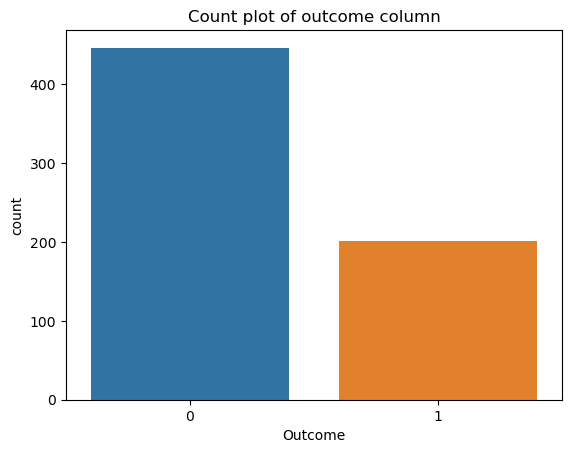

In [40]:
# count plot of Outcome column
sns.countplot(x=df['Outcome'])
plt.title('Count plot of outcome column')
plt.show()

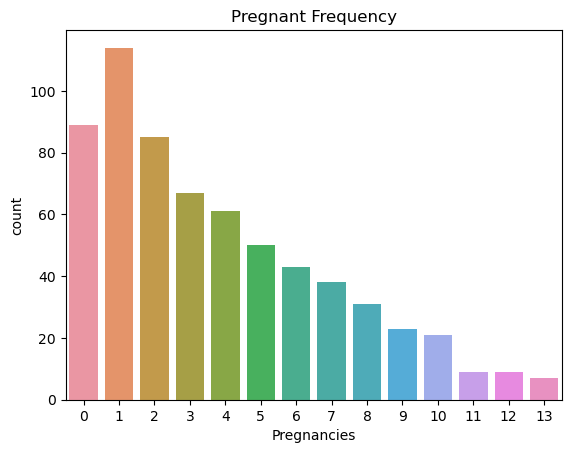

In [42]:
# pregnancies count
sns.countplot(x="Pregnancies",data=df)
plt.title("Pregnant Frequency")
plt.show()

#### Numerical columns

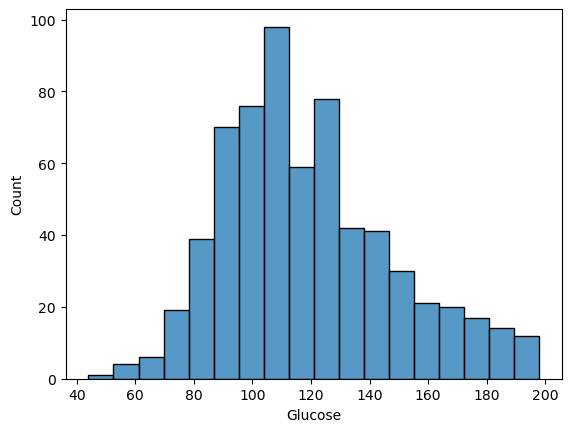

In [44]:
# Histogram of glucose column
sns.histplot(df['Glucose'])
plt.show()

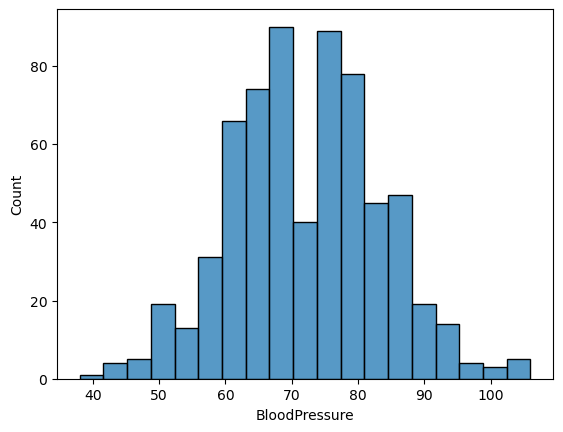

In [46]:
# Histogram of blood_pressure column
sns.histplot(df['BloodPressure'])
plt.show()

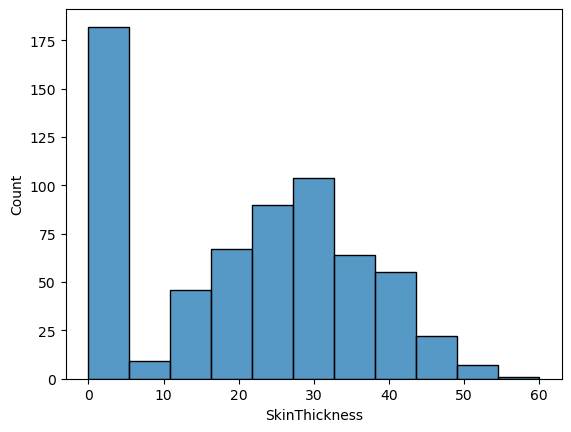

In [47]:
# Histogram of SkinThickness column
sns.histplot(df['SkinThickness'])
plt.show()

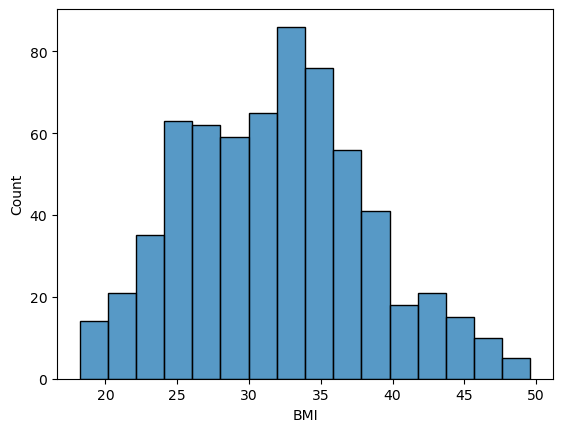

In [48]:
# Histogram of BMI column
sns.histplot(df['BMI'])
plt.show()

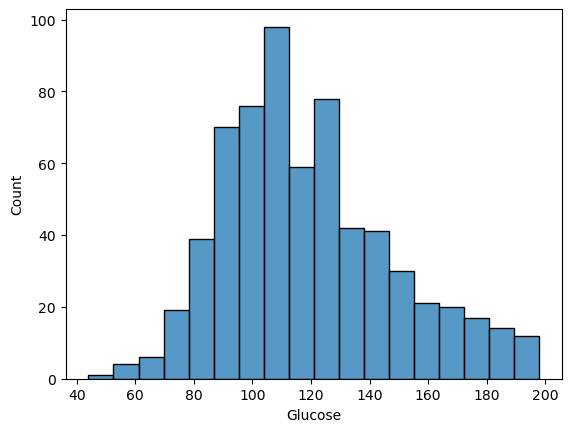

In [49]:
# Histogram of Glucose column
sns.histplot(df['Glucose'])
plt.show()

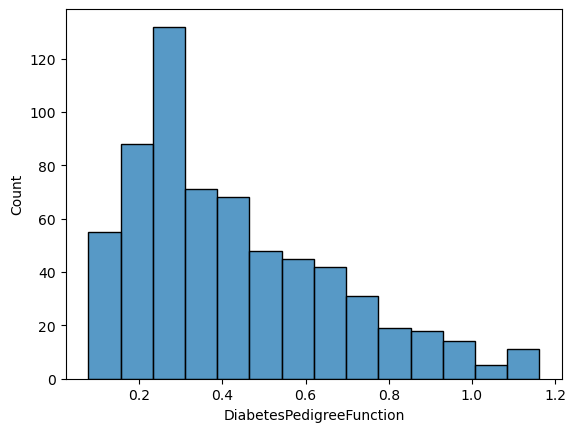

In [55]:
# Histogram of DDiabetesPedigreeFunction column
sns.histplot(df['DiabetesPedigreeFunction'])
plt.show()

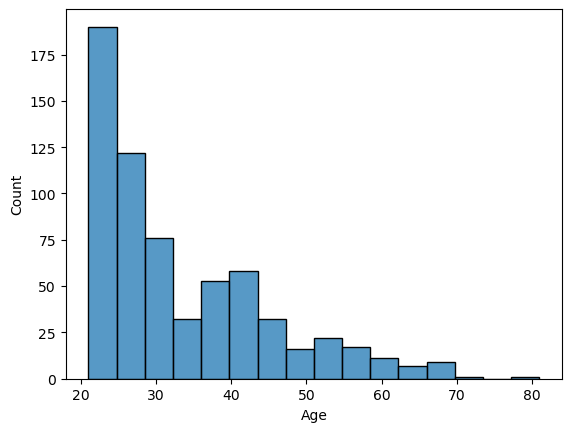

In [56]:
# Histogram of Age column
sns.histplot(df['Age'])
plt.show()

## Bivariate Analysis

##### Age and outcome

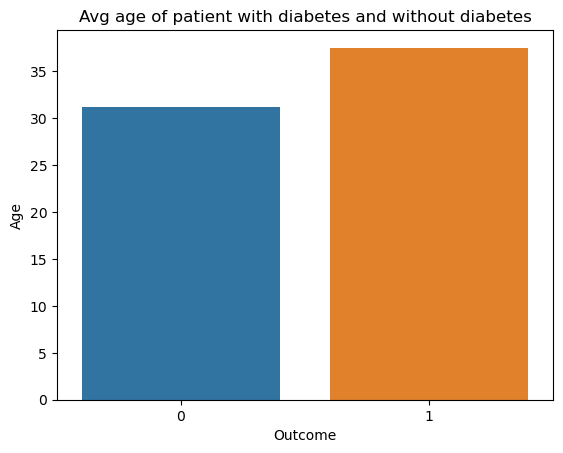

In [65]:
# bar plot
sns.barplot(x='Outcome',y='Age',data=df, ci=False)
plt.title('Avg age of patient with diabetes and without diabetes')
plt.show()

##### Age and DiabetesPedigreeFunction

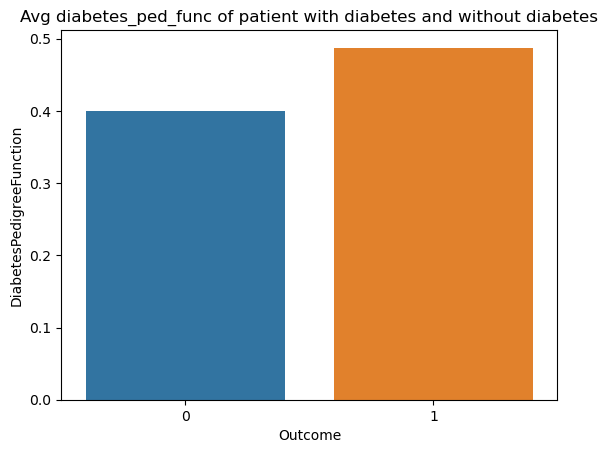

In [64]:
# bar plot 
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df, ci=False)
plt.title('Avg diabetes_ped_func of patient with diabetes and without diabetes')
plt.show()

##### Age and BMI

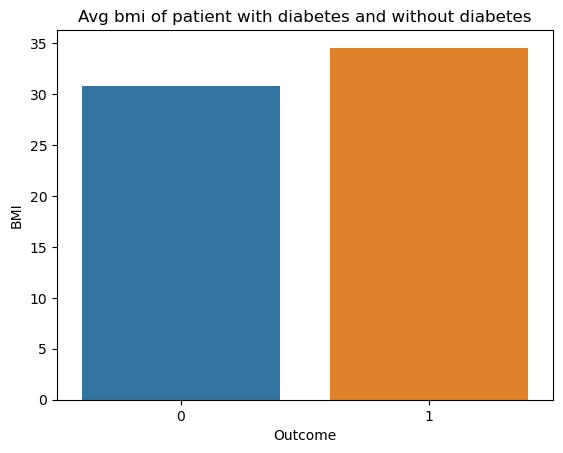

In [66]:
# bar plot
sns.barplot(x='Outcome',y='BMI',data=df,ci= False)
plt.title("Avg bmi of patient with diabetes and without diabetes")
plt.show()

In [ ]:
##### Outcome and Insulin

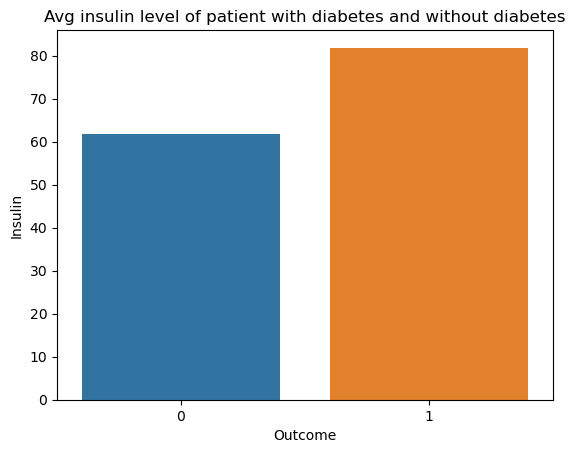

In [67]:
# bar plot
sns.barplot(x="Outcome",y="Insulin",data=df,ci= False)
plt.title('Avg insulin level of patient with diabetes and without diabetes')
plt.show()

##### BloodPressure and Outcome

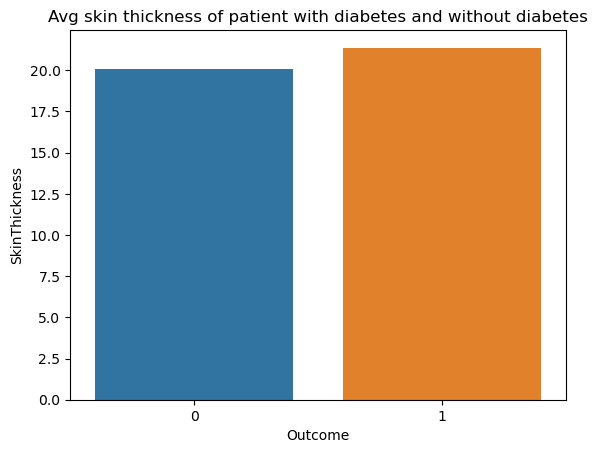

In [68]:
# bar plot
sns.barplot(x='Outcome',y='SkinThickness',data=df,ci= False)
plt.title("Avg skin thickness of patient with diabetes and without diabetes")
plt.show()

##### Outcome and Glucose level

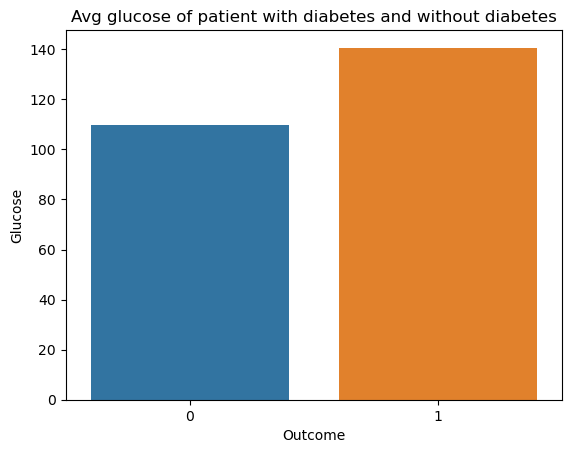

In [69]:
# bar plot
sns.barplot(x='Outcome',y='Glucose',data=df,ci= False)
plt.title('Avg glucose of patient with diabetes and without diabetes')
plt.show()

## Multivariate Analysis

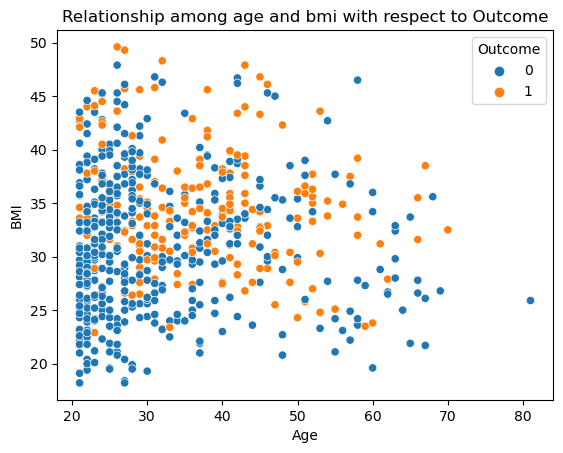

In [73]:
# Scatterplot of age vs bmi with respect to outcome column
sns.scatterplot(x='Age', y='BMI',data=df,hue='Outcome')
plt.title('Relationship among age and bmi with respect to Outcome')
plt.show()

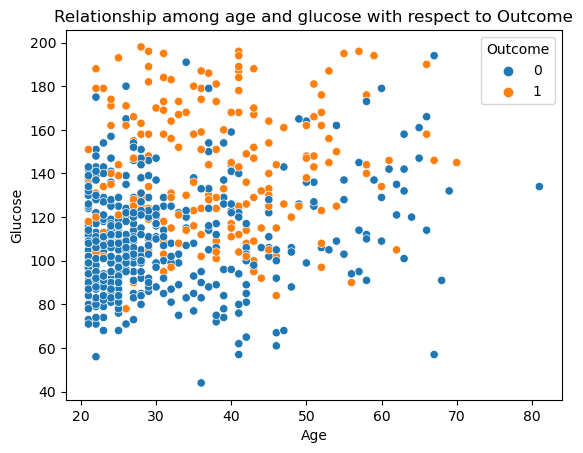

In [74]:
# Scatterplot of age vs glucose with respect to outcome column
sns.scatterplot(x='Age', y='Glucose',data=df,hue='Outcome')
plt.title('Relationship among age and glucose with respect to Outcome')
plt.show()

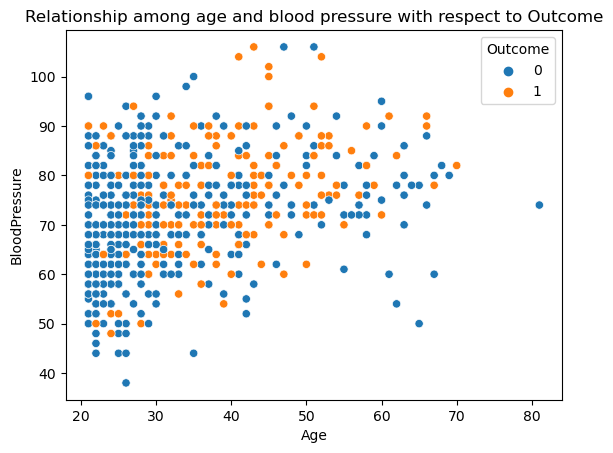

In [75]:
# Scatterplot of age vs BloodPressure with respect to outcome column
sns.scatterplot(x='Age', y='BloodPressure',data=df,hue='Outcome')
plt.title('Relationship among age and blood pressure with respect to Outcome')
plt.show()

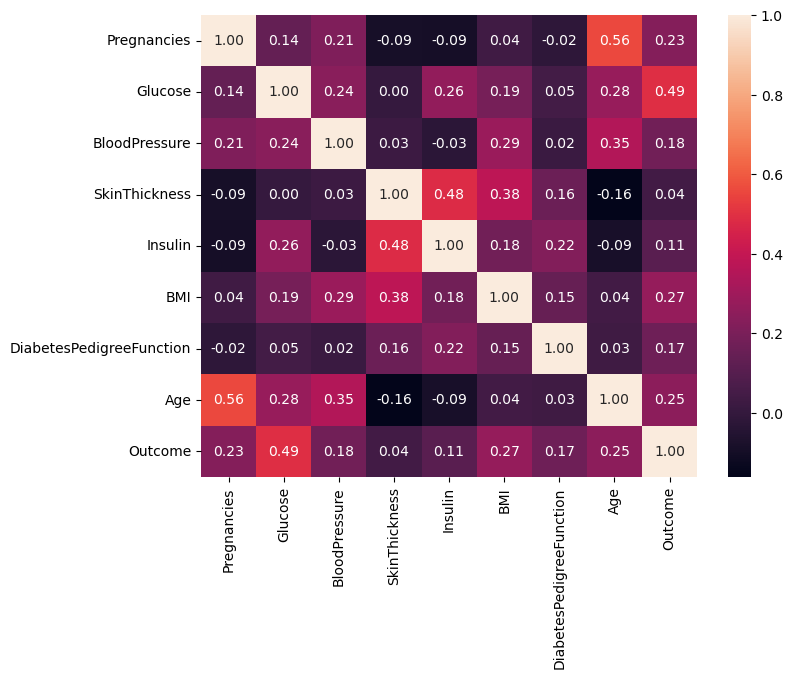

In [77]:
# Heatmap
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.show()

- Looking at the "Outcome" row, we can see that glucose levels have the strongest positive correlation with the outcome variable, followed by age and BMI. This suggests that higher glucose levels, older age, and higher BMI are all associated with a higher likelihood of having diabetes.

- There are some variables that have relatively weak correlations with the outcome variable, such as skin thickness and diabetes pedigree function. This suggests that these variables may not be as strongly related to the likelihood of having diabetes.